# Jurnal Modul 4

In [252]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

(<Axes: >, <matplotlib.image.AxesImage at 0x1e661811e50>)

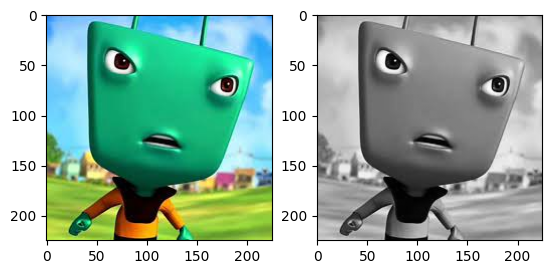

In [253]:
adudu_rgb = plt.imread("Assets/adudu.jpg")
adudu = cv2.cvtColor(adudu_rgb, cv2.COLOR_RGB2GRAY)

plt.subplot(1,2,1), plt.imshow(adudu_rgb)
plt.subplot(1,2,2), plt.imshow(adudu, cmap="gray")

##### Sharpening & Smoothing

In [254]:
kernelSharpening = np.array([
    [1/9, 1/9, 1/9],
    [1/9, 8/9, 1/9],
    [1/9, 1/9, 1/9],
])

kernelSmoothing = np.array([
    [1/10, 1/10, 1/10],
    [1/10, 1/5, 1/10],
    [1/10, 1/10, 1/10],
])

def konvolusi(image, kernel):
    padd_tinggi, padd_lebar = kernel.shape

    padded_img = np.pad(image, ((padd_tinggi, padd_tinggi), (padd_lebar, padd_lebar)), mode="edge")

    hasil = np.zeros([image.shape[0], image.shape[1]])
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            for k in range(kernel.shape[0]):
                for l in range(kernel.shape[1]):
                    hasil[i][j] += padded_img[i+k, j+l] * kernel[k, l]
    return hasil

def filtering(image, kernel):
    padd_tinggi, padd_lebar = kernel.shape
    padded_img = np.pad(image, ((padd_tinggi, padd_tinggi), (padd_lebar, padd_lebar)), mode="edge")
    return konvolusi(padded_img, kernel)

Baris kode diatas merupakan pembuatan kernel untuk proses smoothing dan sharpening, serta pembuatan fungsi untuk melakukan konvolusi dan filtering. Dalam fungsi filtering terdapat proses untuk membuat padding pada gambar sebelum melakukan konvolusi atau proses filtering

##### Mean Filter

In [255]:
def mean(matriks):
    sum_matriks = np.sum(matriks)
    tinggi, lebar = matriks.shape
    return sum_matriks / (tinggi * lebar)

def mean_filter(image, filter_tinggi, filter_lebar):
    tinggi, lebar = image.shape
    hasil = np.zeros(image.shape)

    padd_tinggi = filter_tinggi // 2
    padd_lebar = filter_lebar // 2

    padded_img = np.pad(image, ((padd_tinggi, padd_tinggi), (padd_lebar, padd_lebar)), mode="edge")

    for i in range(tinggi):
        for j in range(lebar):
            patch = np.zeros((filter_tinggi, filter_lebar))
            for ii in range(filter_tinggi):
                for jj in range(filter_lebar):
                    x = i + ii
                    y = j + jj
                    if x < 0 or y < 0 or x >= padded_img.shape[0] or y >= padded_img.shape[1]:
                        patch[ii][jj] = 0
                    else:
                        patch[ii][jj] = padded_img[x][y]
            hasil[i][j] = mean(patch)
    return hasil

Baris kode diatas merupakan fungsi untuk melakukan mean filtering pada gambar. Pada fungsi mean_filter dilakukan pembuatan padding pada gambar sebelum dilakukan proses perubahan nilai pada setiap piksel gambar dengan nilai mean atau 0 tergantung pada kondisi yang terpenuhi.

##### Modus Filter

In [256]:
def modus(matriks):
    array = matriks.flatten()
    counts = {}

    for i in range(len(array)):
        if array[i] not in counts:
            counts[array[i]] = 1
        else:
            counts[array[i]] += 1

    max_count = 0
    modus = None

    for key, nilai in counts.items():
        if nilai > max_count:
            max_count = nilai
            modus = key
    
    return modus

def modus_filter(image, filter_tinggi, filter_lebar):
    tinggi, lebar = image.shape
    hasil = np.zeros(image.shape)

    padd_tinggi = filter_tinggi // 2
    padd_lebar = filter_lebar // 2

    padded_img = np.pad(image, ((padd_tinggi, padd_tinggi), (padd_lebar, padd_lebar)), mode="edge")

    for i in range(tinggi):
        for j in range(lebar):
            patch = np.zeros((filter_tinggi, filter_lebar))
            for ii in range(filter_tinggi):
                for jj in range(filter_lebar):
                    x = i + ii
                    y = j + jj
                    if x < 0 or y < 0 or x >= padded_img.shape[0] or y >= padded_img.shape[1]:
                        patch[ii][jj] = 0
                    else:
                        patch[ii][jj] = padded_img[x][y]
            hasil[i][j] = modus(patch)
    return hasil

Baris kode diatas merupakan fungsi untuk melakukan mean filtering pada gambar. Pada fungsi modus_filter dilakukan pembuatan padding pada gambar sebelum dilakukan proses perubahan nilai pada setiap piksel gambar dengan nilai yang paling sering muncul (modus) atau 0 tergantung pada kondisi yang terpenuhi.

##### Median Filter

In [257]:
def median(matriks):
    array = matriks.flatten()
    array.sort()
    total = len(array)
    if total % 2 == 0:
        median = (array[total//2] + array[total//2])/2
    else:
        median = array[(total//2) + 1]
    return median

def median_filter(image, filter_tinggi, filter_lebar):
    tinggi, lebar = image.shape
    hasil = np.zeros(image.shape)

    padd_tinggi = filter_tinggi // 2
    padd_lebar = filter_lebar // 2

    padded_img = np.pad(image, ((padd_tinggi, padd_tinggi), (padd_lebar, padd_lebar)), mode="edge")

    for i in range(tinggi):
        for j in range(lebar):
            patch = np.zeros((filter_tinggi, filter_lebar))
            for ii in range(filter_tinggi):
                for jj in range(filter_lebar):
                    x = i + ii
                    y = j + jj
                    if x < 0 or y < 0 or x >= padded_img.shape[0] or y >= padded_img.shape[1]:
                        patch[ii][jj] = 0
                    else:
                        patch[ii][jj] = padded_img[x][y]
            hasil[i][j] = median(patch)
    return hasil

Baris kode diatas merupakan fungsi untuk melakukan mean filtering pada gambar. Pada fungsi median_filter dilakukan pembuatan padding pada gambar sebelum dilakukan proses perubahan nilai pada setiap piksel gambar dengan nilai tengah (median) atau 0 tergantung pada kondisi yang terpenuhi.

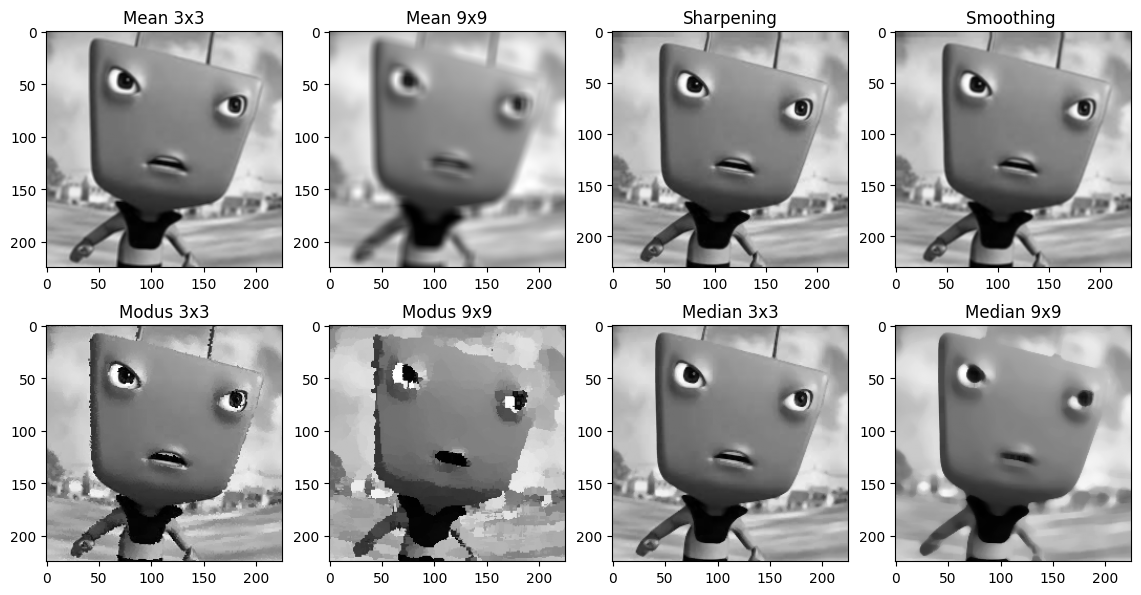

In [258]:
aduduMean3 = mean_filter(adudu, 3, 3)
aduduMean9 = mean_filter(adudu, 9, 9)
aduduSharp = filtering(adudu, kernelSharpening)
aduduSmooth = filtering(adudu, kernelSmoothing)
aduduModus3 = modus_filter(adudu, 3, 3)
aduduModus9 = modus_filter(adudu, 9, 9)
aduduMedian3 = median_filter(adudu, 3, 3)
aduduMedian9 = median_filter(adudu, 9, 9)

plt.figure(figsize=(14, 7))
plt.subplot(2,4,1), plt.imshow(aduduMean3, cmap="gray"), plt.title("Mean 3x3")
plt.subplot(2,4,2), plt.imshow(aduduMean9, cmap="gray"), plt.title("Mean 9x9")
plt.subplot(2,4,3), plt.imshow(aduduSharp, cmap="gray"), plt.title("Sharpening")
plt.subplot(2,4,4), plt.imshow(aduduSmooth, cmap="gray"), plt.title("Smoothing ")
plt.subplot(2,4,5), plt.imshow(aduduModus3, cmap="gray"), plt.title("Modus 3x3")
plt.subplot(2,4,6), plt.imshow(aduduModus9, cmap="gray"), plt.title("Modus 9x9")
plt.subplot(2,4,7), plt.imshow(aduduMedian3, cmap="gray"), plt.title("Median 3x3")
plt.subplot(2,4,8), plt.imshow(aduduMedian9, cmap="gray"), plt.title("Median 9x9")
plt.show()

##### Deteksi Tepi

In [259]:
Rx = np.array([[1, 0,], [0, -1]])
Ry = np.array([[0, 1], [-1, 0]])

Sx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]) 
Sy = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]]) 

Px = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]]) 
Py = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]]) 

In [260]:
def find_gradient(image, kernel):
    centerX, centerY = int((kernel.shape[0] - 1)/2), int((kernel.shape[1] - 1)/2)
    padded_img =  np.pad(image, pad_width = ((centerX, kernel.shape[0]-1-centerX), (centerY, kernel.shape[1]-1-centerY)), mode ="constant")
    return konvolusi(padded_img, kernel)

def detect_edge(image, kernelx, kernely):
    hasilx = find_gradient(image, kernelx)
    hasily = find_gradient(image, kernely)
    hasil = abs(hasilx) + abs(hasily)
    return hasil

##### Deteksi Tepi dengan Kernel Robert

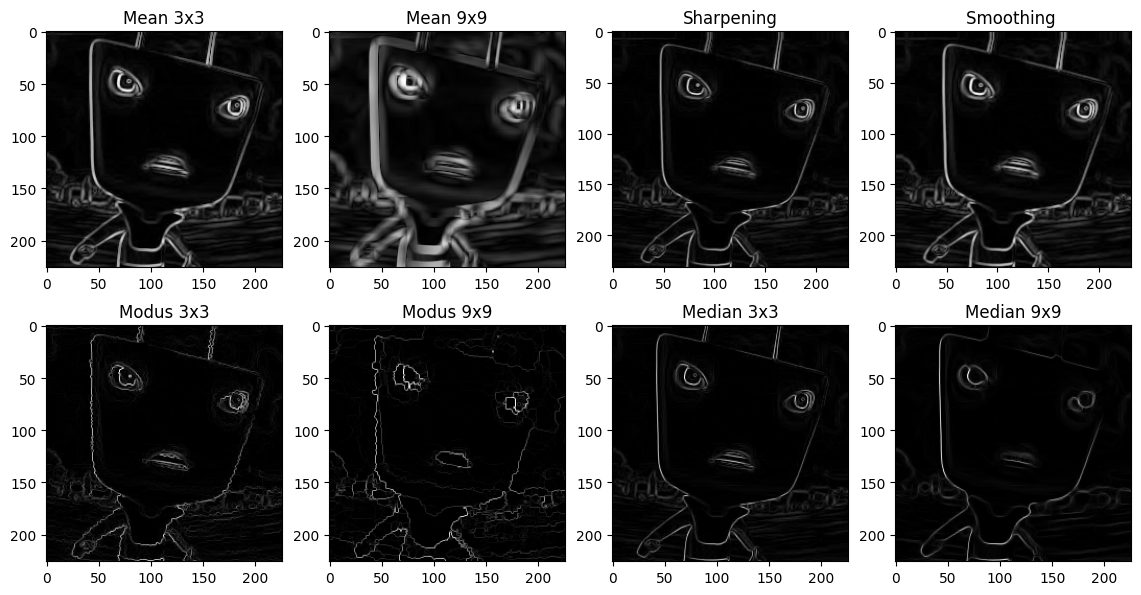

In [261]:
robertMean3 = detect_edge(aduduMean3, Rx, Ry)
robertMean9 = detect_edge(aduduMean9, Rx, Ry)
robertSharp = detect_edge(aduduSharp, Rx, Ry)
robertSmooth = detect_edge(aduduSmooth, Rx, Ry)
robertModus3 = detect_edge(aduduModus3, Rx, Ry)
robertModus9 = detect_edge(aduduModus9, Rx, Ry)
robertMedian3 = detect_edge(aduduMedian3, Rx, Ry)
robertMedian9 = detect_edge(aduduMedian9, Rx, Ry)

plt.figure(figsize=(14, 7))
plt.subplot(2,4,1), plt.imshow(robertMean3, cmap="gray"), plt.title("Mean 3x3")
plt.subplot(2,4,2), plt.imshow(robertMean9, cmap="gray"), plt.title("Mean 9x9")
plt.subplot(2,4,3), plt.imshow(robertSharp, cmap="gray"), plt.title("Sharpening")
plt.subplot(2,4,4), plt.imshow(robertSmooth, cmap="gray"), plt.title("Smoothing ")
plt.subplot(2,4,5), plt.imshow(robertModus3, cmap="gray"), plt.title("Modus 3x3")
plt.subplot(2,4,6), plt.imshow(robertModus9, cmap="gray"), plt.title("Modus 9x9")
plt.subplot(2,4,7), plt.imshow(robertMedian3, cmap="gray"), plt.title("Median 3x3")
plt.subplot(2,4,8), plt.imshow(robertMedian9, cmap="gray"), plt.title("Median 9x9")
plt.show()

##### Deteksi Tepi dengan Kernel Sobel

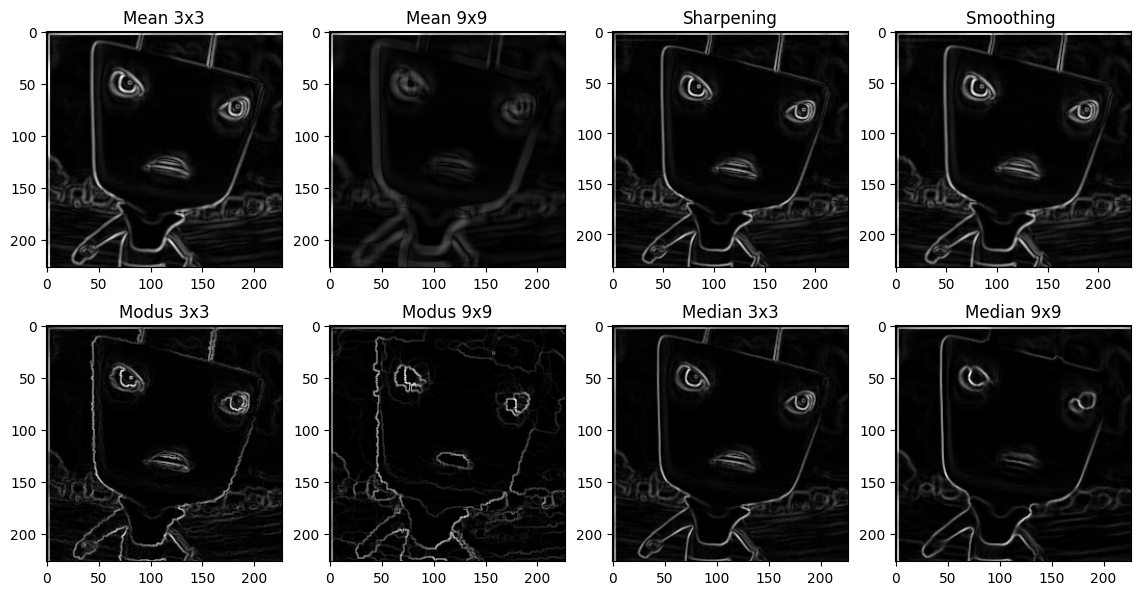

In [262]:
sobelMean3 = detect_edge(aduduMean3, Sx, Sy)
sobelMean9 = detect_edge(aduduMean9, Sx, Sy)
sobelSharp = detect_edge(aduduSharp, Sx, Sy)
sobelSmooth = detect_edge(aduduSmooth, Sx, Sy)
sobelModus3 = detect_edge(aduduModus3, Sx, Sy)
sobelModus9 = detect_edge(aduduModus9, Sx, Sy)
sobelMedian3 = detect_edge(aduduMedian3, Sx, Sy)
sobelMedian9 = detect_edge(aduduMedian9, Sx, Sy)

plt.figure(figsize=(14, 7))
plt.subplot(2,4,1), plt.imshow(sobelMean3, cmap="gray"), plt.title("Mean 3x3")
plt.subplot(2,4,2), plt.imshow(sobelMean9, cmap="gray"), plt.title("Mean 9x9")
plt.subplot(2,4,3), plt.imshow(sobelSharp, cmap="gray"), plt.title("Sharpening")
plt.subplot(2,4,4), plt.imshow(sobelSmooth, cmap="gray"), plt.title("Smoothing ")
plt.subplot(2,4,5), plt.imshow(sobelModus3, cmap="gray"), plt.title("Modus 3x3")
plt.subplot(2,4,6), plt.imshow(sobelModus9, cmap="gray"), plt.title("Modus 9x9")
plt.subplot(2,4,7), plt.imshow(sobelMedian3, cmap="gray"), plt.title("Median 3x3")
plt.subplot(2,4,8), plt.imshow(sobelMedian9, cmap="gray"), plt.title("Median 9x9")
plt.show()

##### Deteksi Tepi dengan Kernel Prewitt

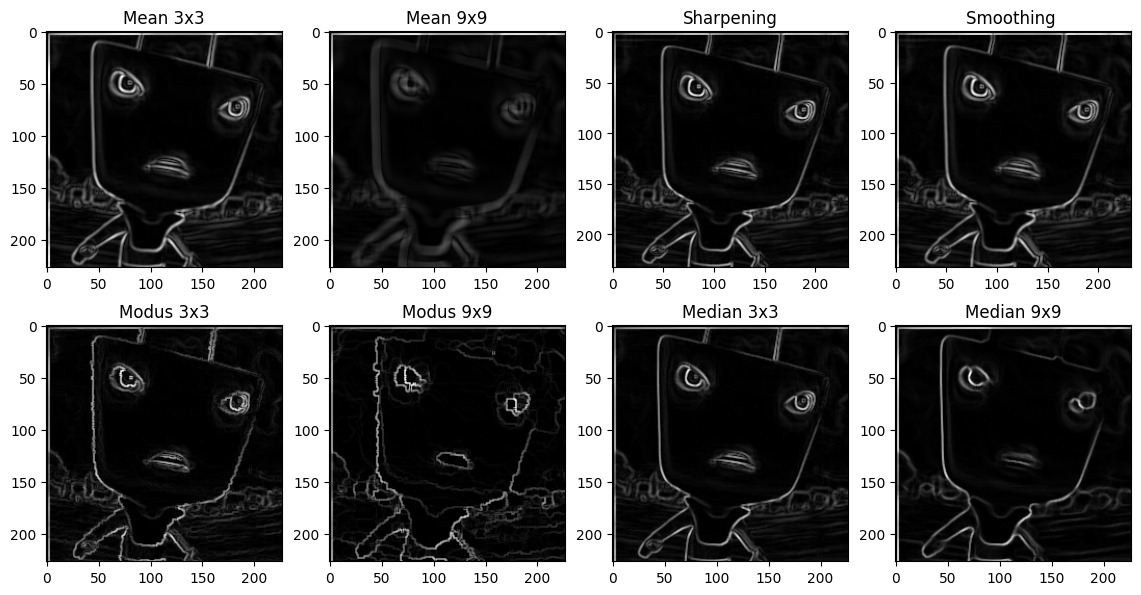

In [263]:
prewittMean3 = detect_edge(aduduMean3, Px, Py)
prewittMean9 = detect_edge(aduduMean9, Px, Py)
prewittSharp = detect_edge(aduduSharp, Px, Py)
prewittSmooth = detect_edge(aduduSmooth, Px, Py)
prewittModus3 = detect_edge(aduduModus3, Px, Py)
prewittModus9 = detect_edge(aduduModus9, Px, Py)
prewittMedian3 = detect_edge(aduduMedian3, Px, Py)
prewittMedian9 = detect_edge(aduduMedian9, Px, Py)

plt.figure(figsize=(14, 7))
plt.subplot(2,4,1), plt.imshow(prewittMean3, cmap="gray"), plt.title("Mean 3x3")
plt.subplot(2,4,2), plt.imshow(prewittMean9, cmap="gray"), plt.title("Mean 9x9")
plt.subplot(2,4,3), plt.imshow(prewittSharp, cmap="gray"), plt.title("Sharpening")
plt.subplot(2,4,4), plt.imshow(prewittSmooth, cmap="gray"), plt.title("Smoothing ")
plt.subplot(2,4,5), plt.imshow(prewittModus3, cmap="gray"), plt.title("Modus 3x3")
plt.subplot(2,4,6), plt.imshow(prewittModus9, cmap="gray"), plt.title("Modus 9x9")
plt.subplot(2,4,7), plt.imshow(prewittMedian3, cmap="gray"), plt.title("Median 3x3")
plt.subplot(2,4,8), plt.imshow(prewittMedian9, cmap="gray"), plt.title("Median 9x9")
plt.show()

##### Boboiboy

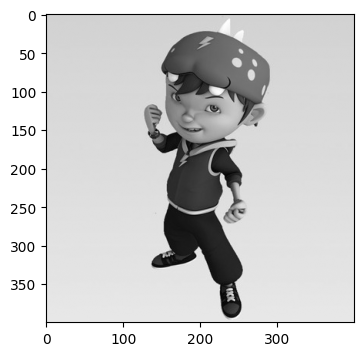

In [351]:
boboiboy_rgb = plt.imread("Assets/boboiboy.jpg")
boboiboy = cv2.cvtColor(boboiboy_rgb, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(4,4))
plt.imshow(boboiboy, cmap="gray")
plt.show()

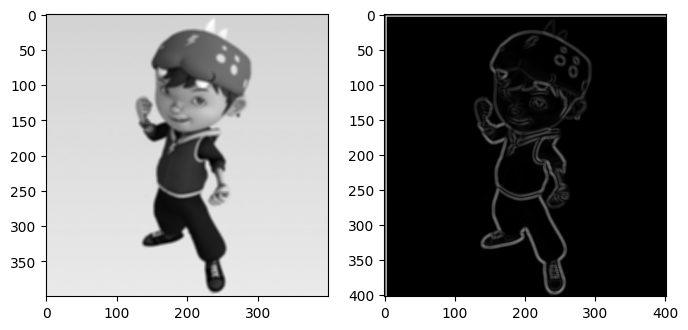

In [313]:
boboiboyMean = mean_filter(boboiboy, 5, 5)
boboiboyPrewitt = detect_edge(boboiboyMean, Px, Py)

plt.figure(figsize=(8,4))
plt.subplot(1,2,1), plt.imshow(boboiboyMean, cmap="gray")
plt.subplot(1,2,2), plt.imshow(boboiboyPrewitt, cmap="gray")
plt.show()

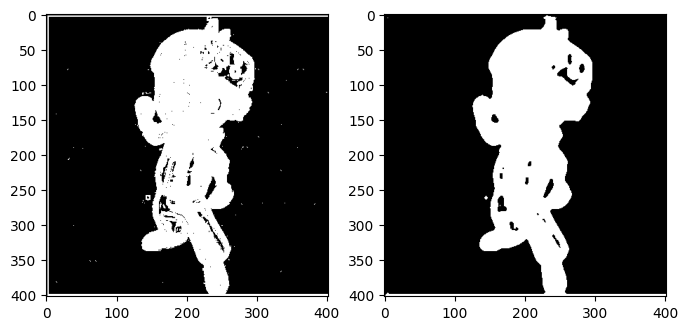

In [310]:
def thresholding(image, threshold = 2):
    hasil = np.zeros((image.shape[0], image.shape[1]))
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if image[i,j] > threshold:
                hasil[i,j] = 255
            else:
                hasil[i,j] = 0
    return hasil

boboiboyUltra = thresholding(boboiboyPrewitt)
boboiboyUltraInstict = median_filter(boboiboyUltra, 7, 7)

plt.figure(figsize=(8,4))
plt.subplot(1,2,1), plt.imshow(boboiboyUltra, cmap="gray")
plt.subplot(1,2,2), plt.imshow(boboiboyUltraInstict, cmap="gray")
plt.show()

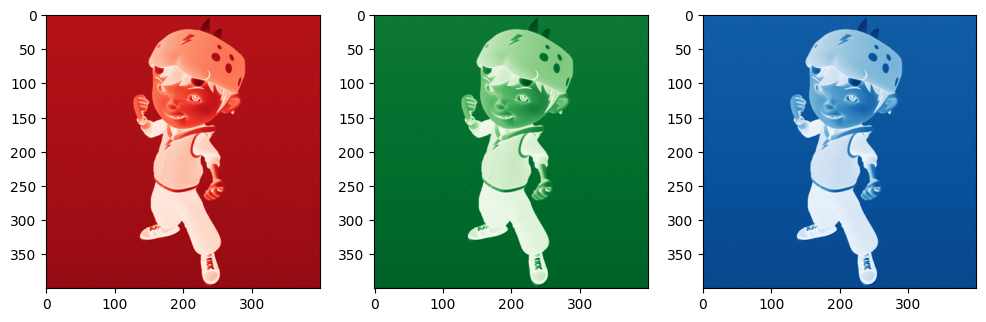

In [366]:
plt.figure(figsize=(12,4))
plt.subplot(1,3,1), plt.imshow(boboiboy, cmap="Reds")
plt.subplot(1,3,2), plt.imshow(boboiboy, cmap="Greens")
plt.subplot(1,3,3), plt.imshow(boboiboy, cmap="Blues")
plt.show()

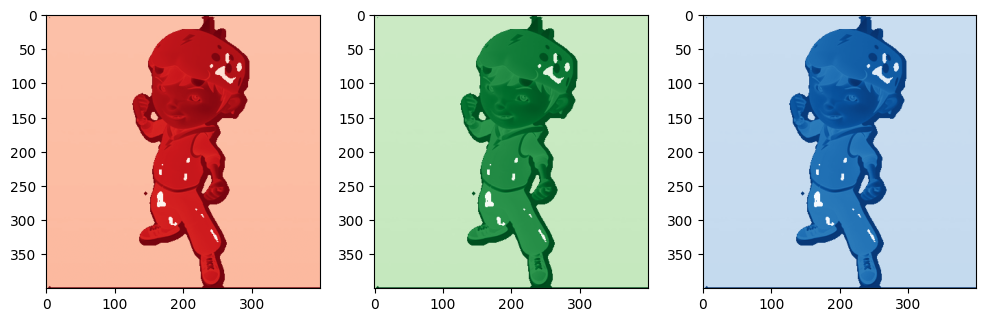

In [395]:
boboiboyUltraInstict_crop = boboiboyUltraInstict[:400, :400]
gabung = (0.3 * boboiboy + 0.7 * boboiboyUltraInstict_crop).astype(np.uint32)

plt.figure(figsize=(12,4))
plt.subplot(1,3,1), plt.imshow(gabung, cmap="Reds")
plt.subplot(1,3,2), plt.imshow(gabung, cmap="Greens")
plt.subplot(1,3,3), plt.imshow(gabung, cmap="Blues")
plt.show()